Train text independent speaker recognition convolutional neural network.

Save model and parameters.

In [1]:
import os

import keras
from keras.utils import to_categorical

import numpy as np
import pickle

# Local
from model_builder import ModelBuilder
from reports import plot_history
from train_funcs import data_to_keras, get_architecture, data_reshape, fit_model

# Import constants
from config import activation, optimizer, dropout_rate, epochs, batch_size

# Paths
from config import data_filename, model_dir, data_filename, data_dir, reports_dir

Using TensorFlow backend.


In [2]:
%load_ext autoreload
%autoreload

### main():

In [3]:
# Verify data file exist.
assert os.path.exists(data_filename), 'Data does not exist.'

In [4]:
# Load input data.
print('Loading the inputs in memory. It might take a while...')
data = pickle.load(open(data_filename, 'rb'))

Loading the inputs in memory. It might take a while...


In [5]:
# Get train and test data.
kx_train, ky_train, kx_test, ky_test, categorical_speakers = data_to_keras(data)

In [6]:
# Reshape data.
# Convolutional models require data reshaping

#if args.cnn_1 or args.cnn_2

if True or False:
    kx_train, ky_train, kx_test, ky_test = data_reshape(kx_train, ky_train, kx_test, ky_test)

In [7]:
# PRint shapes
print('Shape kx_train: ', kx_train.shape)
print('Shape ky_train: ', ky_train.shape)
print('Shape kx_test: ', kx_test.shape)
print('Shape ky_test: ', ky_test.shape)

Shape kx_train:  (1786279, 390, 1)
Shape ky_train:  (1786279, 105)
Shape kx_test:  (1493497, 390, 1)
Shape ky_test:  (1493497, 105)


In [8]:
############################
#           MODEL          #
############################

In [9]:
kx_train.shape

(1786279, 390, 1)

In [10]:
ky_train.shape[1]

105

In [11]:
# Instantiate ModelBuilder(input_shape, num_categories)
builder = ModelBuilder(kx_train.shape, ky_train.shape[1])

In [12]:
# Model attributes
print(builder.num_categories)
print(builder.activation)
print(builder.optimizer)
print(builder.dropout_rate)
print(builder.architecture)
print(builder.batch_size)

105
relu
adam
0.25
baseline
512


In [13]:
# Create model object.
model = builder(activation=activation, 
                optimizer=optimizer, 
                dropout_rate=dropout_rate, 
                architecture=get_architecture(True, False), 
                batch_size=batch_size)

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# Model attributes
print(builder.num_categories)
print(builder.activation)
print(builder.optimizer)
print(builder.dropout_rate)
print(builder.architecture)
print(builder.batch_size)

105
relu
adam
0.25
cnn_1
512


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (512, 390, 1)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (512, 390, 16)            64        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (512, 195, 16)            0         
_________________________________________________________________
batch_normalization_1 (Batch (512, 195, 16)            64        
_________________________________________________________________
conv1d_2 (Conv1D)            (512, 195, 32)            1568      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (512, 97, 32)             0         
_________________________________________________________________
batch_normalization_2 (Batch (512, 97, 32)             128       
__________

In [225]:
# Train
model, history = fit_model(model, kx_train, ky_train, kx_test, ky_test, max_epochs=2)

Train on 1785600 samples, validate on 1493100 samples
Epoch 1/2
1785600/1785600 [==============================] - 1062s 595us/step - loss: 1.2088 - acc: 0.6626 - val_loss: 0.9525 - val_acc: 0.7182


/Users/j/deep-speaker-data/venv-speaker/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_softmax_acc` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/Users/j/deep-speaker-data/venv-speaker/lib/python3.7/site-packages/keras/callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_softmax_acc` which is not available. Available metrics are: val_loss,val_acc,loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/2
1785600/1785600 [==============================] - 1064s 596us/step - loss: 0.7640 - acc: 0.7769 - val_loss: 2.3585 - val_acc: 0.4628


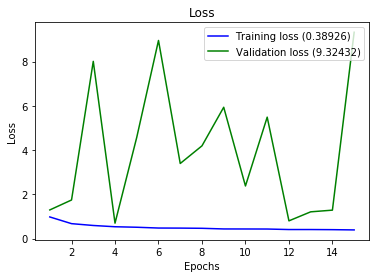

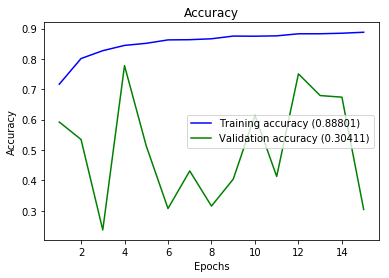

In [190]:
plot_history(history)

In [23]:
from keras.utils import plot_model
t = plot_model(model,
              to_file=reports_dir + '/vis_model.png')

In [191]:
# Save the trained model and its parameters
builder.save(model)

Saved model to disk


In [203]:
acum = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]

acum = np.array(acum)

for i in ky_train:
    acum = np.add(acum,i)
    
c = np.sum(acum)

print(c)
print(acum / c * 100)

1786279.0
[1.15105199 1.09910042 0.97146079 1.13151417 0.9382073  1.16762275
 0.66115092 0.82400342 1.04009508 0.89980345 0.78946234 0.93994275
 1.23032292 0.84510874 0.96535871 0.94464527 1.18615289 0.88944672
 1.18111448 1.23412972 0.85848851 1.23883223 1.06562301 0.76354254
 0.98484055 0.94587688 0.92807451 0.96614247 1.13638463 1.10307516
 0.72726601 0.920181   0.99833229 0.87936991 0.9546661  1.17512438
 0.99497335 0.89907568 1.40386804 0.92897022 0.87063667 1.04490956
 0.93904704 1.04300616 1.14383028 0.93389666 0.86061584 1.11449555
 0.95897673 1.00583392 1.02050128 0.82926575 0.82674655 1.14489394
 0.96267156 1.05409065 0.79310119 0.83749515 0.89095824 0.93412059
 0.85025911 1.01697439 0.74546026 0.99732461 0.82394743 0.89325352
 0.9173259  0.97980215 0.87847419 1.07536393 1.11387975 0.78520769
 1.08801593 0.78386411 0.97157275 1.44747825 0.99279004 0.93876712
 0.93546417 0.7586161  0.77591462 0.80032291 0.97224454 1.03891945
 0.80205836 0.9059615  0.80569721 1.17450857 0.87108

In [205]:
acum

array([20561., 19633., 17353., 20212., 16759., 20857., 11810., 14719.,
       18579., 16073., 14102., 16790., 21977., 15096., 17244., 16874.,
       21188., 15888., 21098., 22045., 15335., 22129., 19035., 13639.,
       17592., 16896., 16578., 17258., 20299., 19704., 12991., 16437.,
       17833., 15708., 17053., 20991., 17773., 16060., 25077., 16594.,
       15552., 18665., 16774., 18631., 20432., 16682., 15373., 19908.,
       17130., 17967., 18229., 14813., 14768., 20451., 17196., 18829.,
       14167., 14960., 15915., 16686., 15188., 18166., 13316., 17815.,
       14718., 15956., 16386., 17502., 15692., 19209., 19897., 14026.,
       19435., 14002., 17355., 25856., 17734., 16769., 16710., 13551.,
       13860., 14296., 17367., 18558., 14327., 16183., 14392., 20980.,
       15560., 18923., 20216., 14975., 14392., 20951., 13436., 12876.,
       10447., 19077., 16402., 13193., 18431., 13779., 11911., 11941.,
       13555.])

In [204]:
acum_test = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]

acum_test = np.array(acum_test)

for i in ky_test:
    acum_test = np.add(acum_test,i)


c = np.sum(acum_test)

print(c)
print(acum_test / c * 100)

1493497.0
[1.04673796 1.01178643 0.82765483 0.91248928 0.80616165 1.2413818
 0.69414267 0.81446431 1.06742765 0.96384526 0.77221447 0.92320239
 1.32447538 0.88671085 1.02022301 0.85262977 1.16351087 0.95741739
 1.17355442 1.01078208 0.97502707 1.1410803  1.21767904 0.88443432
 0.94208425 0.77931191 0.95627912 0.83722967 1.0519606  1.07874338
 0.74857867 0.87867602 1.03602485 0.80676426 1.01526819 1.09421043
 0.9435573  0.98908803 1.35152598 0.80883992 0.83194007 1.22772259
 0.83816707 1.05617889 1.15279776 1.13297851 0.87767167 1.3068657
 0.96217133 1.17723705 1.05450496 0.85899068 0.8177452  1.33043454
 1.07331987 1.14442814 0.87137771 0.90164225 1.00529161 0.97576359
 0.8572498  1.0133934  0.83153833 0.96759485 0.80709904 0.82926179
 0.9334468  1.02698566 0.91329276 1.12668455 1.12896109 0.77174578
 1.21232249 0.7426195  0.88316214 1.34509812 1.0900591  0.99169935
 0.95621217 0.76592052 0.72507678 0.76451442 1.01058121 0.86053069
 0.74020905 0.83548879 0.82430698 1.23816787 0.8290609

In [206]:
acum_test

array([15633., 15111., 12361., 13628., 12040., 18540., 10367., 12164.,
       15942., 14395., 11533., 13788., 19781., 13243., 15237., 12734.,
       17377., 14299., 17527., 15096., 14562., 17042., 18186., 13209.,
       14070., 11639., 14282., 12504., 15711., 16111., 11180., 13123.,
       15473., 12049., 15163., 16342., 14092., 14772., 20185., 12080.,
       12425., 18336., 12518., 15774., 17217., 16921., 13108., 19518.,
       14370., 17582., 15749., 12829., 12213., 19870., 16030., 17092.,
       13014., 13466., 15014., 14573., 12803., 15135., 12419., 14451.,
       12054., 12385., 13941., 15338., 13640., 16827., 16861., 11526.,
       18106., 11091., 13190., 20089., 16280., 14811., 14281., 11439.,
       10829., 11418., 15093., 12852., 11055., 12478., 12311., 18492.,
       12382., 16168., 17505., 13899., 12153., 18715., 10416.,  9857.,
        9313., 15204., 13481., 10205., 14737., 10269.,  8776.,  8411.,
       10621.])

In [122]:
Shape kx_train:  (1760406, 390)
Shape kx_train:  (1760406, 105)
Shape kx_train:  (1530197, 390)
Shape kx_train:  (1530197, 105)

TypeError: only integer scalar arrays can be converted to a scalar index

In [22]:
reports_dir

'../outputs/model/reports'